In [ ]:
# !pip3 install sklearn
# !pip3 install pandas
# !pip3 install openpyxl

##Import packages

In [ ]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import datetime

##Import document as data frame

In [ ]:
df = pd.read_excel('./Fluxo_Escolar_por_Escola.xlsx')

##Drop unused columns

In [ ]:
drop_columns = ['NM_DIRETORIA','CD_REDE_ENSINO',	'CD_ESCOLA', 'APR_1', 'REP_1', 'ABA_1', 'APR_2', 'REP_2', 'ABA_2']
df_cleaned = df.drop(drop_columns, axis='columns')

##Renaming columns

In [ ]:
columns_renamed = {
    'Ano':'ano', 
    'NM_MUNICIPIO':'municipio', 
    'NM_COMPLETO_ESCOLA':'escola', 
    'aprovado':'aprovado', 
    'REP_3':'reprovado', 
    'abandono':'abandono'
}
df_cleaned = df_cleaned.rename(columns=columns_renamed)

##Drop rows that contains NaN from data frame (cleaned)

In [ ]:
df_cleaned = df_cleaned.dropna()

In [ ]:
#df_cleaned.head(20)

Exportando o resultado de hoje 07-11 23:31

In [ ]:
df_cleaned.to_excel('fluxo_escolar_parcialmente_tratado.xlsx', encoding="utf-8")

# Cleaning and normalizing data

##Install packages if necessary

In [ ]:
# !pip3 install yellowbrick

##Import packages

In [ ]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

##Import document as data frame

In [ ]:
df_cleaned = pd.read_excel('./output/fluxo_escolar_filtered_correct_percenteges.xlsx',engine='openpyxl')
print(df_cleaned.shape)
df_cleaned.head()

##Removing fields with "-" value, time value and NaN value

In [ ]:
df_cleaned = df_cleaned[df_cleaned != "-"]
df_cleaned = df_cleaned[df_cleaned != datetime.time(0, 0)]
df_cleaned = df_cleaned.dropna()

print(df_cleaned.shape)
df_cleaned.head()

##Converting datetime values to correct format

In [ ]:
for index, row in df_cleaned.iterrows():
    if(isinstance(row['aprovado'], datetime.datetime)):
        if row['aprovado'].month < 10:
            new_value = str(row['aprovado'].day) + ".0" + str(row['aprovado'].month)
        else:
            new_value = str(row['aprovado'].day) + "." + str(row['aprovado'].month)
        df_cleaned['aprovado'] = df_cleaned['aprovado'].replace([row['aprovado']], new_value)

    if(isinstance(row['reprovado'], datetime.datetime)):
        if row['reprovado'].month < 10:
            new_value = str(row['reprovado'].day) + ".0" + str(row['reprovado'].month)
        else:
            new_value = str(row['reprovado'].day) + "." + str(row['reprovado'].month)
        df_cleaned['reprovado'] = df_cleaned['reprovado'].replace([row['reprovado']], new_value)

    if(isinstance(row['abandono'], datetime.datetime)):
        if row['abandono'].month < 10:
            new_value = str(row['abandono'].day) + ".0" + str(row['abandono'].month)
        else:
            new_value = str(row['abandono'].day) + "." + str(row['abandono'].month)
        df_cleaned['abandono'] = df_cleaned['abandono'].replace([row['abandono']], new_value)

print(df_cleaned.shape)
df_cleaned.head()


##Removing lines with negative number

In [ ]:
df_cleaned['abandono'] = df_cleaned['abandono'].astype(str)
df_cleaned = df_cleaned[df_cleaned["abandono"].str.contains("-") == False]

print(df_cleaned.shape)
df_cleaned.head()

##Convert columns to float

In [ ]:
df_cleaned['aprovado'] = df_cleaned['aprovado'].astype(float)
df_cleaned['reprovado'] = df_cleaned['reprovado'].astype(float)
df_cleaned['abandono'] = df_cleaned['abandono'].astype(float)

##Remove rows that have just 0 values and reset index

In [ ]:
indexZero = df_cleaned[(df_cleaned['aprovado'] == 0) & (df_cleaned['reprovado'] == 0) & (df_cleaned['abandono'] == 0)].index
df_cleaned.drop(indexZero, inplace=True)

df_cleaned = df_cleaned.reset_index()

print(df_cleaned.shape)
df_cleaned.head()

##Rename fields

In [ ]:
# df_cleaned = df_cleaned.rename(columns={'Ano':'ano', 'NM_MUNICIPIO':'municipio', 'CD_REDE_ENSINO':'id_rede_ensino', 'CD_ESCOLA':'id_escola', 'NM_COMPLETO_ESCOLA':'escola', 'APR_3':'aprovado', 'REP_3':'reprovado', 'abandono':'abandono'})
# df_cleaned.head()

##Normalizing data

In [ ]:
normalized_list = preprocessing.normalize([df_cleaned['ano'],df_cleaned['aprovado'],df_cleaned['reprovado'],df_cleaned['abandono']])

df_cleaned['ano_normalized'] = normalized_list[0]
df_cleaned['aprovado_normalized'] = normalized_list[1]
df_cleaned['reprovado_normalized'] = normalized_list[2]
df_cleaned['abandono_normalized'] = normalized_list[3]

df_cleaned.head()

##Creating normalized file

In [ ]:
df_cleaned.to_excel('./output/FluxoEscolarNormalizado.xlsx', encoding="utf-8")

# Start of creating the predictive model

##Import libs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

#Check point: Open the file created from the normalization above


##Choosing which municipality we want to analyze

In [4]:
df = pd.read_excel('./output/FluxoEscolarNormalizado.xlsx', engine='openpyxl')
df = df[df["municipio"] == "SAO PAULO"]
df.head()

,Unnamed: 0.1,index,Unnamed: 0,ano,municipio,escola,aprovado,reprovado,abandono,ano_normalized,aprovado_normalized,reprovado_normalized,abandono_normalized
87,87,87,142,2015,SAO PAULO,ALFREDO VIANELLO GREGORIO COMENDADOR,85.18,13.94,0.88,0.006621,0.006190,0.008698,0.001234
88,88,88,143,2015,SAO PAULO,JOAO BATISTA DE CARVALHO MONSENHOR,77.42,13.05,9.53,0.006621,0.005626,0.008142,0.013366
89,89,89,145,2015,SAO PAULO,RENATA GRAZIANO DE OLIVEIRA PRADO PROFESSORA,69.80,18.62,11.58,0.006621,0.005073,0.011618,0.016241
90,90,90,153,2015,SAO PAULO,LUIS MAGALHAES DE ARAUJO PROFESSOR,75.42,13.24,11.34,0.006621,0.005481,0.008261,0.015905
91,91,91,155,2015,SAO PAULO,HERCULANO DE FREITAS PROFESSOR,64.92,27.49,7.59,0.006621,0.004718,0.017152,0.010645


##Removing unnecessary columns

In [5]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'ano', 'municipio', 'escola', 'aprovado', 'reprovado', 'abandono', 'reprovado_normalized', 'abandono_normalized'], axis='columns')
df.head()

,ano_normalized,aprovado_normalized
87,0.006621,0.006190
88,0.006621,0.005626
89,0.006621,0.005073
90,0.006621,0.005481
91,0.006621,0.004718


#Scraping the data to decrease bias

In [6]:
random_df = df.sample(frac=1).reset_index(drop=True)
random_df.head()

,ano_normalized,aprovado_normalized
0,0.006611,0.005722
1,0.006641,0.007267
2,0.006638,0.007214
3,0.006638,0.007092
4,0.006638,0.007267


#Split the data frame between training and testing

In [7]:
train, test = train_test_split(random_df, test_size=0.2)

## Handling training data

#Split between predictors and classes

In [8]:
train.columns

Index(['ano_normalized', 'aprovado_normalized'], dtype='object')

#Get all the feature examples

In [9]:
x_df_train = train.iloc[:, :-1].values
x_df_train

array([[0.00663096],
       [0.00663753],
       [0.00663096],
       ...,
       [0.0066211 ],
       [0.00662767],
       [0.0066211 ]])

#Get all labels from the target

In [10]:
y_df_train = train.iloc[:, -1].values
y_df_train

array([0.00726741, 0.00636698, 0.00695128, ..., 0.00430521, 0.00643093,
       0.00487716])

#Handling categorical data with one hot encoder

In [ ]:
# onehotencoder_train = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1])], remainder='passthrough')

In [ ]:
# x_df_train = onehotencoder_train.fit_transform(x_df_train).toarray()
# x_df_train[0]

## Handling test data

#Split between predictors and classes

In [11]:
test.columns

Index(['ano_normalized', 'aprovado_normalized'], dtype='object')

#Get all the feature examples

In [12]:
x_df_test = test.iloc[:, :-1].values
x_df_test

array([[0.00661124],
       [0.00662439],
       [0.00663096],
       [0.00662767],
       [0.0066211 ],
       [0.0066211 ],
       [0.00663753],
       [0.00662767],
       [0.00664082],
       [0.0066211 ],
       [0.00662767],
       [0.00662439],
       [0.00662439],
       [0.00663096],
       [0.00663096],
       [0.0066211 ],
       [0.00663753],
       [0.00664082],
       [0.00662767],
       [0.00661124],
       [0.00664082],
       [0.0066211 ],
       [0.00662439],
       [0.0066211 ],
       [0.00664082],
       [0.00662439],
       [0.00661124],
       [0.00662439],
       [0.00664082],
       [0.0066211 ],
       [0.00661124],
       [0.00662439],
       [0.0066211 ],
       [0.00664082],
       [0.00663753],
       [0.0066211 ],
       [0.00663753],
       [0.00664082],
       [0.00663753],
       [0.00662439],
       [0.00663753],
       [0.00662767],
       [0.00662767],
       [0.00662767],
       [0.00664082],
       [0.00663753],
       [0.00664082],
       [0.006

#Get all labels from the target

In [13]:
y_df_test = test.iloc[:, -1].values
y_df_test

array([0.00590477, 0.00555594, 0.00691858, 0.00649779, 0.006835  ,
       0.00726741, 0.00726741, 0.00726741, 0.00708863, 0.00718093,
       0.00726741, 0.0070523 , 0.00665186, 0.00635899, 0.00567294,
       0.00627032, 0.00720201, 0.00726741, 0.00480013, 0.00563006,
       0.00726741, 0.00559881, 0.00532047, 0.00626306, 0.00726741,
       0.00545419, 0.0054789 , 0.00585535, 0.00716785, 0.00664823,
       0.0056664 , 0.00726741, 0.00570419, 0.00726741, 0.00726741,
       0.00467585, 0.00721218, 0.00704794, 0.00722381, 0.00475943,
       0.00725578, 0.00509809, 0.00648399, 0.00532629, 0.00709009,
       0.00680666, 0.00693965, 0.00715041, 0.00694329, 0.00532774,
       0.00405958, 0.00538951, 0.00668311, 0.00564242, 0.00716276,
       0.00516858, 0.00726741, 0.0071068 , 0.00707919, 0.00513297,
       0.00604503, 0.00657701, 0.00567003, 0.00685898, 0.0052885 ,
       0.00650942, 0.00726741, 0.00631683, 0.00582192, 0.00592076,
       0.00726741, 0.00605811, 0.00632483, 0.00719983, 0.00726

#Handling categorical data with one hot encoder

In [ ]:
# onehotencoder_test = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1])], remainder='passthrough')

In [ ]:
# x_df_test = onehotencoder_test.fit_transform(x_df_test).toarray()
# x_df_test[0]

##Save variables

In [14]:
with open('students.pickle', mode='wb') as f:
    pickle.dump([x_df_train, y_df_train, x_df_test, y_df_test], f)

In [91]:
# variable to compile percent error
height = []

# Test using Linear Regression Model

##Creating a linear regression object. Conducting training. Performing tests

In [15]:
regr = linear_model.LinearRegression()
regr.fit(x_df_train, y_df_train)
aprovados_y_pred = regr.predict(x_df_test)


##Coefficients. Mean absolute percentage error. Coefficient of determination: "1" is a perfect prediction.

In [16]:
print("Coefficients:", regr.coef_)
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_df_test, aprovados_y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_df_test, aprovados_y_pred))

Coefficients: [64.86306553]
Mean absolute percentage error: 0.10
Coefficient of determination: 0.38


##Plots

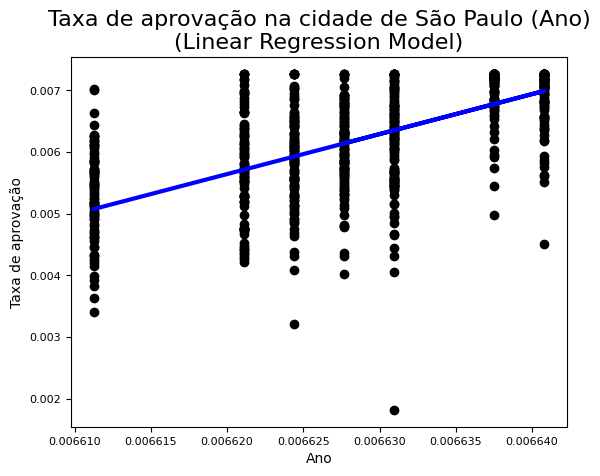

In [102]:
plt.scatter(x_df_test, y_df_test, color="black")
plt.plot(x_df_test, aprovados_y_pred, color="blue", linewidth=3)

plt.title('Taxa de aprovação na cidade de São Paulo (Ano)\n(Linear Regression Model)')
plt.ylabel("Taxa de aprovação")
plt.xlabel("Ano")
plt.show()

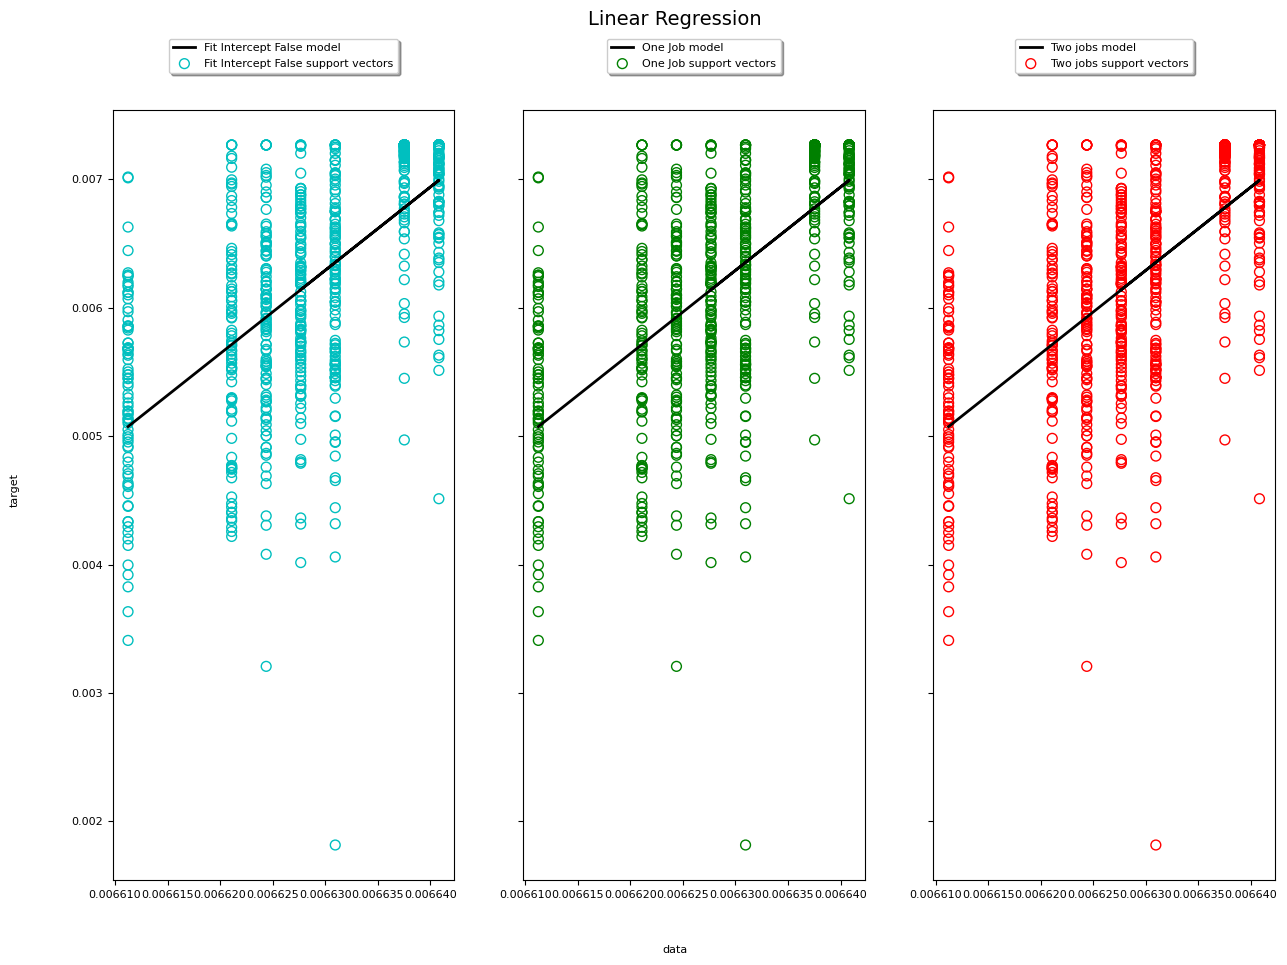

In [92]:
lw = 2

lr_fit_intercept_false = linear_model.LinearRegression(fit_intercept=False)
lr_fit_one_job = linear_model.LinearRegression(fit_intercept=False, n_jobs=1)
lr_fit_two_jobs = linear_model.LinearRegression(fit_intercept=False, n_jobs=2)

lrs = [lr_fit_intercept_false, lr_fit_one_job, lr_fit_two_jobs]
lrs_label = ["Fit Intercept False", "One Job", "Two jobs"]
model_color = ["c", "g", "r"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, lr in enumerate(lrs):
    prediction = regr.fit(x_df_train, y_df_train).predict(x_df_test)
    axes[ix].plot(
        x_df_test,
        prediction,
        color="k",
        lw=lw,
        label="{} model".format(lrs_label[ix]),
    )
    axes[ix].scatter(
        x_df_test,
        y_df_test,
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(lrs_label[ix]),
    )
    # axes[ix].scatter(
    #     x_df_test,
    #     y_df_test,
    #     facecolor="none",
    #     edgecolor="k",
    #     s=20,
    #     label="other training data",
    # )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

    mape = mean_absolute_percentage_error(y_df_test, prediction)
    height.append(mape)

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Linear Regression", fontsize=14)
plt.show()

# Test using SVM
##Creating a SVR model

In [21]:
model_SVR = svm.SVR(kernel="linear")
sc_X = StandardScaler() 
sc_y = StandardScaler() 

# Dimensionando dados de treino
X = sc_X.fit_transform(x_df_train) 
y = sc_y.fit_transform(y_df_train.reshape(-1, 1))
model_SVR.fit(X, y)

## Modelo de predição com dados de teste dimensionados
X_test = sc_X.fit_transform(x_df_test) 
y_test = sc_y.fit_transform(y_df_test.reshape(-1, 1))
Y_pred = model_SVR.predict(X_test)
print(mean_absolute_percentage_error(y_test, Y_pred))

## Modelo de predição com dados de teste NÃO dimensionados
# Y_pred = model_SVR.predict(x_df_test)
# print(mean_absolute_percentage_error(y_df_test, Y_pred))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.9547396558386836


##Calculating model score

In [22]:
## Score com dados de teste dimensionados
model_SVR.score(X_test, y_test)

## Score com dados de teste NÃO dimensionados
# model_SVR.score(x_df_test, y_df_test)

0.36646903541206544

##plots

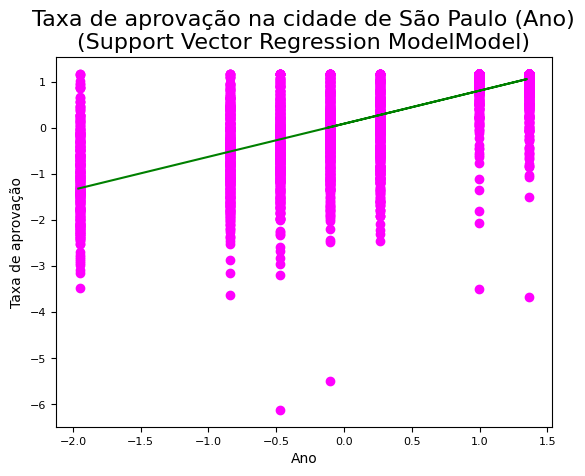

In [103]:
plt.scatter(X, y, color = 'magenta')
plt.plot(X_test, model_SVR.predict(X_test), color = 'green')
plt.title('Taxa de aprovação na cidade de São Paulo (Ano)\n(Support Vector Regression ModelModel)')
plt.ylabel("Taxa de aprovação")
plt.xlabel("Ano")
plt.show()

##Analyze SVR model to diferents Kernel

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


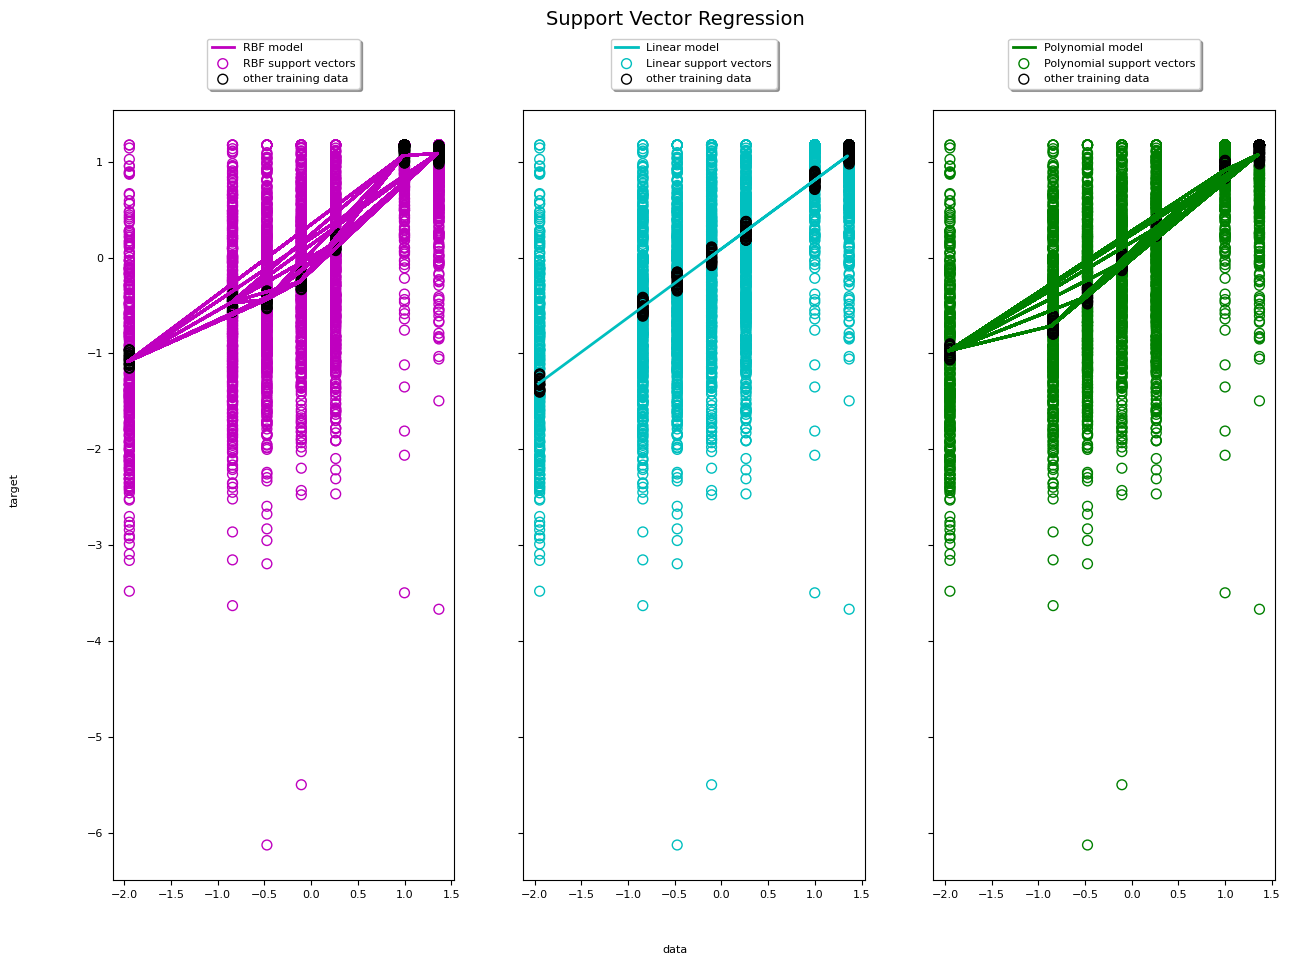

In [94]:
lw = 2

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    prediction = svr.fit(X, y).predict(X_test)
    axes[ix].plot(
        X_test,
        prediction,
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

    mape = mean_absolute_percentage_error(y_test, prediction)
    height.append(mape)

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### Random Forest

In [25]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_df_train, y_df_train)
Y_pred = model_RFR.predict(x_df_test)

mean_absolute_percentage_error(y_df_test, Y_pred)


0.09119238120455558

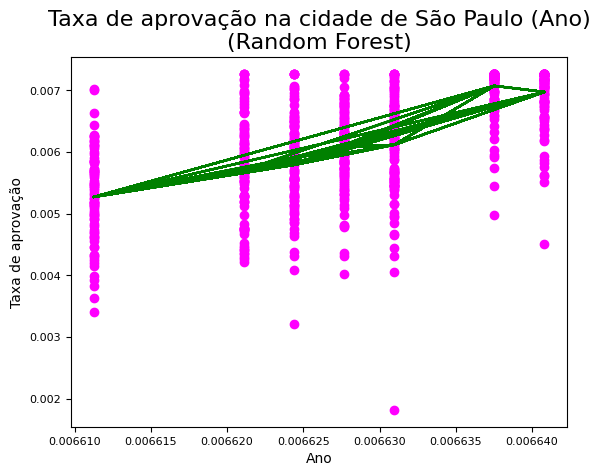

In [104]:
plt.scatter(x_df_test, y_df_test, color = 'magenta')
plt.plot(x_df_test, model_RFR.predict(x_df_test), color = 'green')
plt.title('Taxa de aprovação na cidade de São Paulo (Ano)\n(Random Forest)')
plt.ylabel("Taxa de aprovação")
plt.xlabel("Ano")
plt.show()

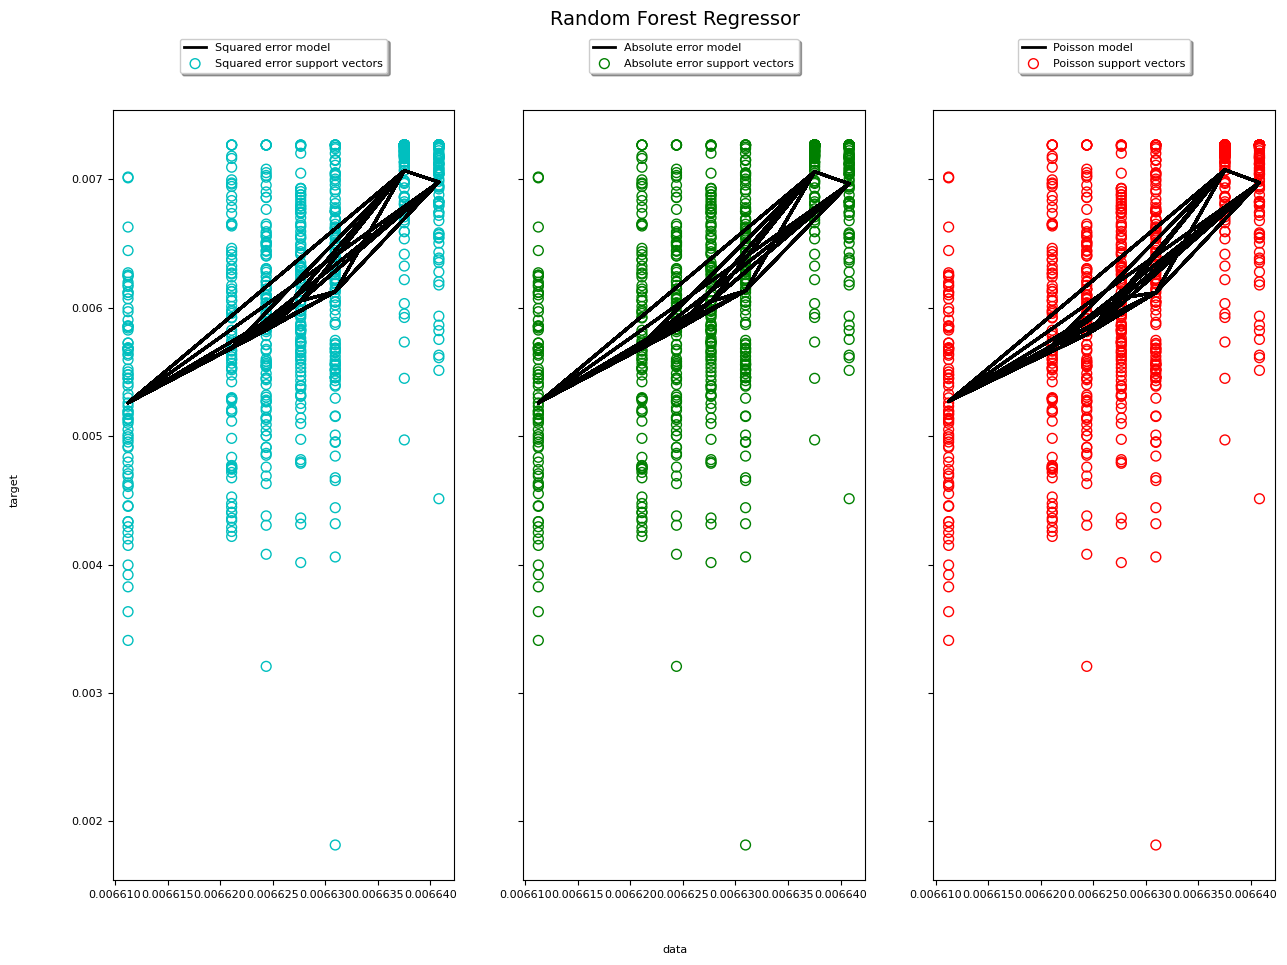

In [96]:
lw = 2

rfr_squared = RandomForestRegressor(n_estimators=10, criterion="squared_error")
rfr_absolute = RandomForestRegressor(n_estimators=10, criterion="absolute_error")
rfr_poisson = RandomForestRegressor(n_estimators=10, criterion="poisson")

rfrs = [rfr_squared, rfr_absolute, rfr_poisson]
rfrs_label = ["Squared error", "Absolute error", "Poisson"]
model_color = ["c", "g", "r"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, rfr in enumerate(rfrs):
    prediction = model_RFR.fit(x_df_train, y_df_train).predict(x_df_test)
    axes[ix].plot(
        x_df_test,
        prediction,
        color="k",
        lw=lw,
        label="{} model".format(rfrs_label[ix]),
    )
    axes[ix].scatter(
        x_df_test,
        y_df_test,
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(rfrs_label[ix]),
    )
    # axes[ix].scatter(
    #     x_df_test,
    #     y_df_test,
    #     facecolor="none",
    #     edgecolor="k",
    #     s=20,
    #     label="other training data",
    # )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

    mape = mean_absolute_percentage_error(y_df_test, prediction)
    height.append(mape)

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Random Forest Regressor", fontsize=14)
plt.show()

# Comparating models

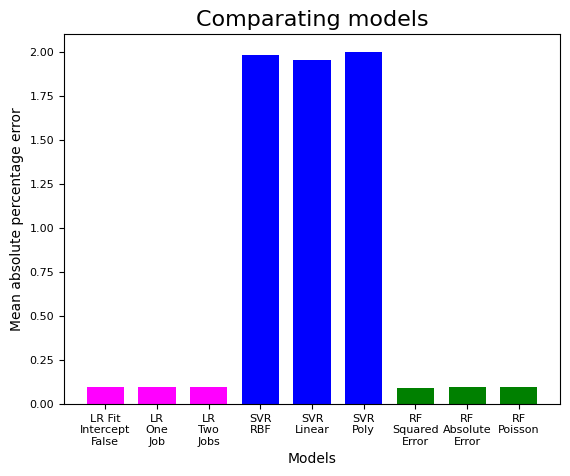

In [100]:

left = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]

tick_label = ['LR Fit\nIntercept\nFalse', 'LR\nOne\nJob', 'LR\nTwo\nJobs', 'SVR\nRBF', 'SVR\nLinear', 'SVR\nPoly', 'RF\nSquared\nError', 'RF\nAbsolute\nError', 'RF\nPoisson']
plt.bar(left, height, tick_label = tick_label, width = 1.8, color = ['magenta', 'magenta', 'magenta', 'blue', 'blue', 'blue', 'green', 'green', 'green'])
  
plt.xlabel('Models')
plt.ylabel('Mean absolute percentage error')
plt.title('Comparating models')
  
plt.show()